In [1]:
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pingouin as pg
import seaborn as sns

In [2]:
data_path = "data_cleaned_feature_31.csv"
data = pd.read_csv(data_path)
print(data.columns)
data.shape

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds'],
      dtype='object')


(149885, 31)

In [3]:
# drop duplicates
data = data.drop(['video_trending_country'],axis=1).drop_duplicates()
data.shape

(114683, 30)

In [4]:
data.select_dtypes(include=['int64', 'float64'])

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count,engagement_rate,video_duration_seconds
0,156272.0,4615.0,238.0,46473647,321000,207,0.031055,774.0
1,2148646.0,222346.0,11225.0,6395292,158000,61,0.108706,317.0
2,1106491.0,44317.0,2406.0,2807917957,8880000,1612,0.042226,2223.0
3,1185486.0,25373.0,2664.0,122939495,389000,635,0.023650,1297.0
4,69035.0,4346.0,125.0,85074466,436000,1429,0.064764,1269.0
...,...,...,...,...,...,...,...,...
149880,8548359.0,378107.0,3089.0,5592638348,12500000,1019,0.044593,24.0
149881,22553412.0,623924.0,7208.0,6331232520,8890000,480,0.027984,15.0
149882,63090147.0,2451904.0,3598.0,33506017412,44400000,3136,0.038921,15.0
149883,765386.0,27876.0,716.0,42201127,379000,809,0.037356,6566.0


In [5]:
duplicate_summary = {
    "Total Rows": len(data),
    "Duplicate Rows (Entire Row)": data.duplicated().sum(),
    "Duplicate Video IDs": data.duplicated(subset=['video_id']).sum()
}
duplicate_summary 

{'Total Rows': 114683,
 'Duplicate Rows (Entire Row)': 0,
 'Duplicate Video IDs': 96373}

In [6]:
data.duplicated(subset=['video_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
149880     True
149881     True
149882     True
149883     True
149884     True
Length: 114683, dtype: bool

In [7]:
data = data.drop_duplicates(subset=['video_id'])

In [8]:
# text_features = ['video_description', 'video_title']

# def clean_text_column(column):
#     """Clean a text column by filling nulls and removing special characters."""
#     return (
#         column.fillna("")  # Fill missing values with empty string
#         .str.replace(r"[^\w\s]", " ", regex=True)  # Remove special characters
#         .str.lower()  # Convert to lowercase
#         .str.strip()  # Remove leading/trailing spaces
#     )

# for text_feature in text_features:
#     data[text_feature] = clean_text_column(data[text_feature])

In [9]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
# sentence_embeddings = {}
# for text_feature in text_features:
#     text_data = data[text_feature].tolist()
#     embeddings = model.encode(text_data, show_progress_bar=True)
#     sentence_embeddings[text_feature] = pd.DataFrame(
#         embeddings, 
#         columns=[f"{text_feature}_dim{i}" for i in range(embeddings.shape[1])]
#     )

In [10]:
def time_to_seconds(time_str):
    days, time_part = time_str.split(" days ")
    days = int(days)
    h, m, s = map(int, time_part.split(":"))
    total_seconds = days * 86400 + h * 3600 + m * 60 + s
    return total_seconds

data['time_to_trend_difference_seconds'] = data['time_difference'].apply(time_to_seconds)
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [11]:
# columns_for_fa = [ 'video_view_count', 'video_like_count', 'video_comment_count',
#     'channel_view_count', 
#     'channel_video_count', 'time_to_trend_difference_seconds',
#     'video_duration_seconds']
# fa_data = data[columns_for_fa].apply(pd.to_numeric, errors='coerce').dropna()
# scaler = StandardScaler()
# factor_data_standardized = scaler.fit_transform(fa_data)
# kmo_all, kmo_model = calculate_kmo(factor_data_standardized)
# print(f"KMO: {kmo_model}")
# chi_square_value, p_value = calculate_bartlett_sphericity(factor_data_standardized)
# print(f"Bartlett's Test - Chi-Square: {chi_square_value}, p-value: {p_value}")
# fa = FactorAnalyzer(n_factors=3, rotation='varimax') 
# fa.fit(factor_data_standardized)
# eigenvalues, _ = fa.get_eigenvalues()
# print(f"Eigenvalues: {eigenvalues}")
# loadings = fa.loadings_
# print(f"Factor Loadings:\n{loadings}")

In [12]:
# factor_loadings = fa.loadings_
# factor_loadings

# threshold = 0.4
# strong_loadings = np.abs(factor_loadings) > threshold

# for i in range(factor_loadings.shape[1]):  
#     print(f"Factor {i+1} includes variables: {np.where(strong_loadings[:, i])[0]}")

In [13]:
# alpha1, ci1 = pg.cronbach_alpha(pd.DataFrame(factor_data_standardized).iloc[:, [0, 1,2]])
# print(f"Factor 1 - Cronbach's Alpha: {alpha1}, 95% CI: {ci1}")

In [14]:
# import seaborn as sns
# factor_loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=columns_for_fa)
# sns.heatmap(factor_loadings_df, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Factor Loadings')
# plt.show()

In [15]:
data['is_trending'] = data['time_difference'].apply(
    lambda x: 1 if int(x.split(" ")[0]) <= 1 else 0 
)
data.is_trending.value_counts() ## checking how fast videos are trending

is_trending
0    14594
1     3716
Name: count, dtype: int64

In [16]:
# do split (" ") and take the first element

data["time_difference_days"] = data["time_difference"].apply(lambda x: int(x.split(" ")[0]))
data["time_difference_days"]

0          5
1         26
2          3
3          3
4          3
          ..
149685     1
149704    13
149725     7
149737     1
149822    14
Name: time_difference_days, Length: 18310, dtype: int64

In [17]:
data.shape

(18310, 36)

In [18]:
# # hstack embedded_text and data
# data = pd.concat([data, embedded_text], axis=1)
# data.shape

In [ ]:
majority_class = data[data['is_trending'] == 0]
minority_class = data[data['is_trending'] == 1]
# shape
majority_class.shape, minority_class.shape

from sklearn.utils import resample


minority_upsampled = resample(minority_class, 
                              replace=True,     
                              n_samples=int(round(len(majority_class) * 0.7, -2)),  
                              random_state=42)  

data = pd.concat([majority_class, minority_upsampled])
data.is_trending.value_counts()

((14594, 36), (3716, 36))

In [21]:
pd.concat([majority_class, minority_upsampled]).shape

(24794, 36)

In [22]:
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce').dt.tz_localize(None)
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce').dt.tz_localize(None)
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
data['channel_video_channel_publish_difference']

0         2939.0
1            NaN
2         3423.0
3            NaN
4            NaN
           ...  
5350      3852.0
115899       NaN
25269     3595.0
47793        NaN
6942      3172.0
Name: channel_video_channel_publish_difference, Length: 24794, dtype: float64

In [23]:
data['channel_video_channel_publish_difference'] = data['channel_video_channel_publish_difference'].fillna(data['channel_video_channel_publish_difference'].mean()) # di ko na alam kung tama to

In [24]:
data['is_trending'].value_counts()

is_trending
0    14594
1    10200
Name: count, dtype: int64

In [25]:
data['is_weekend'].value_counts()

is_weekend
False    17284
True      7510
Name: count, dtype: int64

In [26]:
# features = [
#     'video_duration_seconds', 'channel_video_count',
#     'video_category_id', 'video_trending_country', 'is_weekend',
#     'video_definition', 'video_dimension', 'video_licensed_content',
#     'channel_country', 'channel_have_hidden_subscribers','channel_video_channel_publish_difference'
# ]


In [27]:
data.channel_have_hidden_subscribers

0         False
1         False
2         False
3         False
4         False
          ...  
5350      False
115899    False
25269     False
47793     False
6942      False
Name: channel_have_hidden_subscribers, Length: 24794, dtype: bool

In [28]:
# data['is_trending'] = data['time_difference'].apply(
#     lambda x: 1 if int(x.split(" ")[0]) <= 3 else 0
# )

In [29]:
# embedded_text_columns = embedded_text.columns.tolist()
# # embedded_text_columns

In [30]:
categorical_features = [
    'video_category_id', 'is_weekend',
    'video_definition', 'video_dimension', 'video_licensed_content',
    'channel_country', 'channel_have_hidden_subscribers'
]
numerical_features = [
    'video_duration_seconds', 'channel_video_count', 'channel_video_channel_publish_difference'
]

In [31]:
X_categorical = data[categorical_features]
X_numerical = data[numerical_features]
#X_text = data[embedded_text_columns]
y = data['is_trending']

In [32]:
X_categorical.shape

(24794, 7)

In [33]:
X_categorical.shape

(24794, 7)

In [34]:
X_numerical.shape

(24794, 3)

In [35]:
import numpy as np
#X = np.hstack((X_numerical, X_categorical))
X = pd.concat((X_numerical, X_categorical),axis=1)
X.shape

(24794, 10)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train

,video_duration_seconds,channel_video_count,channel_video_channel_publish_difference,video_category_id,is_weekend,video_definition,video_dimension,video_licensed_content,channel_country,channel_have_hidden_subscribers
80691,9515.0,2709,2549.000000,Sports,False,hd,2d,True,Spain,False
34771,22.0,180,3150.000000,People & Blogs,False,hd,2d,True,Mexico,False
7144,980.0,264,2224.000000,Gaming,False,hd,2d,True,Unknown,False
12518,21.0,191,2496.000000,Entertainment,False,hd,2d,True,Turkey,False
79964,938.0,3136,3977.000000,Education,True,hd,2d,True,India,False
...,...,...,...,...,...,...,...,...,...,...
105503,241.0,21139,3894.442801,Sports,True,hd,2d,True,Italy,False
14916,12897.0,8814,2608.000000,Sports,False,hd,2d,True,United States,False
1163,156.0,36,3894.442801,Music,False,hd,2d,False,Singapore,False
50066,2788.0,101484,5414.000000,News & Politics,False,hd,2d,True,Philippines,False


In [38]:
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

In [39]:
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder

encoder = DecisionTreeEncoder(regression=False)
X_train_encode = encoder.fit_transform(X_train_categorical, y_train)
X_test_encode = encoder.transform(X_test_categorical)

c:\Users\Administrator\anaconda3\envs\ptcnn\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) channel_country.
  warnings.warn(


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [41]:
X_train = np.hstack((X_train_encode, X_train_scaled))
X_test = np.hstack((X_test_encode, X_test_scaled))

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8956849038849307
[[3889  447]
 [ 329 2774]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4336
           1       0.86      0.89      0.88      3103

    accuracy                           0.90      7439
   macro avg       0.89      0.90      0.89      7439
weighted avg       0.90      0.90      0.90      7439



In [43]:
feature_names = data[categorical_features].columns.tolist() +  data[numerical_features].columns.tolist()

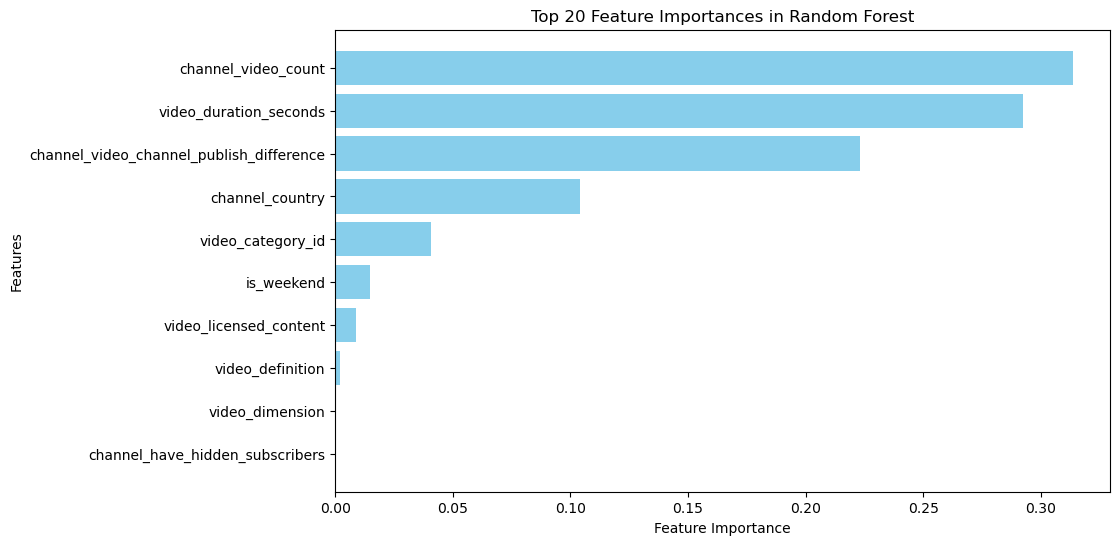

In [44]:
#feature_names = pd.concat([data[categorical_features],data[numerical_features],data[embedded_text_columns]]).columns
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  
plt.show()